# Case Study: Pancreatic Endocrinogenesis

## Import Packages

In [32]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
#srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)

import celldancer.cdplt as cdplt
# import celldancer.velocity_estimation as calc_velocity
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
test=(0,1)
test[0]

0

## Velocity Estimation

In [33]:
%autoreload 2

#raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
#raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
# raw_path='/Users/chen.weiqing/code/celldancer/PancreaticEndocrinogenesis.csv'
raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
cell_type_u_s=pd.read_csv(raw_path)
result_path = None
# result_path = '/Users/chen.weiqing/code/celldancer/pancreas/velocity_result'
cell_type_u_s

,gene_name,u0,s0,clusters,cellID,embedding1,embedding2
0,Sntg1,0.045809,0.000000,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,Sntg1,0.058600,0.000000,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,Sntg1,0.058696,0.000000,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,Sntg1,0.198549,0.000000,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,Sntg1,0.000000,0.000000,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...
7391995,Erdr1,0.461130,0.505213,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,Erdr1,0.643907,0.531752,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,Erdr1,0.626258,0.406073,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,Erdr1,0.409493,0.514864,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


## Set Parameters

In [38]:
%autoreload 2
max_epoches=200
check_val_every_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
permutation_ratio=0.125#0.5
n_neighbors=50
optimizer='Adam'
n_neighbors_downsample=30
speed_up=True
norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
norm_cell_distribution=True
save_path=None

gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"]
# gene_list=None
# Velocity Estimation
loss_df, cellDancer_df=velocity_estimation(cell_type_u_s,\
                                         gene_list=gene_list[0:3],\
                                         max_epoches=max_epoches,\
                                         check_val_every_n_epoch=check_val_every_n_epoch,\
                                         patience=patience,\
                                         permutation_ratio=permutation_ratio,\
                                         speed_up=speed_up,\
                                         norm_u_s=norm_u_s,\
                                         norm_cell_distribution=norm_cell_distribution,\
                                        n_jobs=1,\
                                         save_path=save_path)

Using /Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-05-25 20-07-55 as the output path.


Velocity Estimation: 100%|████████████████████████| 1/1 [00:05<00:00,  5.59s/it]


In [36]:
cellDancer_df

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ank,0.902838,1.363756,0.933472,1.243595,0.243657,2.970182,2.409354,0.070616,AAACCTGAGAGGGATA,Pre-endocrine,6.143066,-0.063644
1,1,Ank,0.009015,0.030083,0.014588,0.191946,0.096399,2.960732,2.317994,0.070616,AAACCTGAGCCTTGAT,Ductal,-9.906417,0.197778
2,2,Ank,1.117681,1.263363,1.022822,1.087029,0.192855,3.002423,2.430235,0.070616,AAACCTGAGGCAATTA,Alpha,7.559791,0.583762
3,3,Ank,0.032245,0.086038,0.045421,0.234966,0.101907,2.957813,2.319933,0.070616,AAACCTGCATCATCCC,Ductal,-11.283765,4.218998
4,4,Ank,0.274058,0.246699,0.234488,0.330611,0.102634,2.974856,2.343215,0.070616,AAACCTGGTAAGTGGC,Ngn3 high EP,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,3691,Abcc8,1.079821,2.189839,1.730247,9.090103,3.453686,2.504676,1.584747,0.084445,TTTGTCAAGTGACATA,Pre-endocrine,4.768472,-1.388353
11084,3692,Abcc8,0.081782,0.028974,0.082909,2.801243,1.276036,2.879037,1.512797,0.084445,TTTGTCAAGTGTGGCA,Ngn3 high EP,-1.873335,-4.182650
11085,3693,Abcc8,0.129734,0.156934,0.177504,3.291691,1.461423,2.846811,1.522002,0.084445,TTTGTCAGTTGTTTGG,Ductal,-9.882250,-0.105594
11086,3694,Abcc8,2.397159,2.343147,2.953667,8.958193,3.350943,2.568684,1.514479,0.084445,TTTGTCATCGAATGCT,Alpha,6.612424,4.531895


## Sample Genes' Velocity Plot

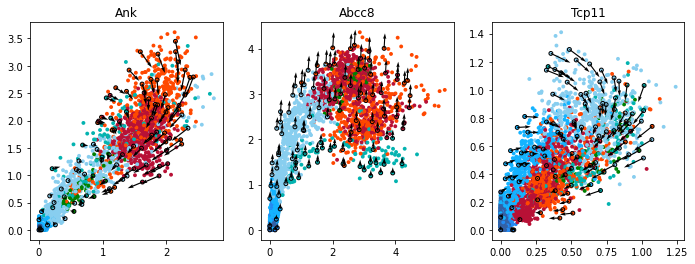

In [37]:
gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"][0:3]

ncols=5

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        cellDancer_df=cellDancer_df,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=1, 
        s = 15,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()

## Load velocity estimation result of 2000 genes

In [52]:
#detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/velocity_result_all_genes_with_bin/2000_smooth/combined_detail/combined_detail.csv'
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes_with_bin/combined_detail/combined_detail.csv'
#detail_result_path = '/Users/chen.weiqing/code/celldancer/pancreas/combined_detail.csv'

cellDancer_df=pd.read_csv(detail_result_path)

## Compute Cell Velocity and Estimate Pseudotime

In [8]:
%autoreload 2

# set parameters
projection_neighbor_size=100
speed_up=(60,60)
grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10
expression_scale=None

# compute_cell_velocity
gene_choice=list(set(cellDancer_df.gene_name))
cellDancer_df=compute_cell_velocity(cellDancer_df=cellDancer_df,
              gene_list=gene_choice,
              projection_neighbor_choice="embedding",
              expression_scale=expression_scale,#'power10',
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# plot_cell_velocity
fig, ax = plt.subplots(figsize=(20,20))
clusters = cellDancer_df['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,cellDancer_df, colors=cdplt.colormap.colormap_pancreas, alpha=0.5, s=30,velocity=True)
ax.axis('off')
plt.show()

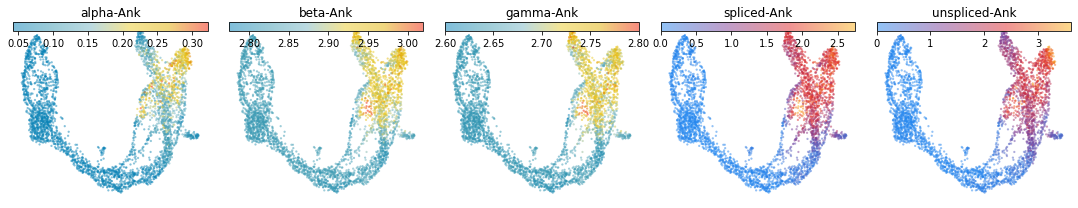

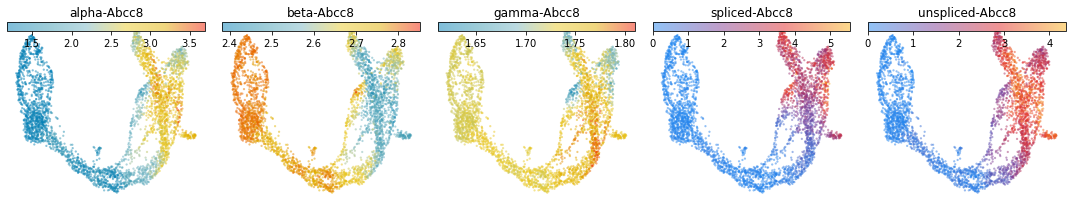

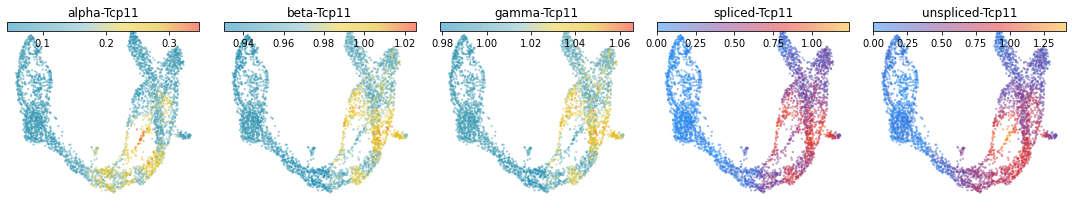

In [11]:
%autoreload 2


for gene in gene_list[0:5]:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='spliced', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unspliced', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

## UMAP using alpha, beta, and gamma

In [12]:
cellDancer_df=cdplt.cell.embedding_kinetic_para(cellDancer_df,'alpha')
cellDancer_df=cdplt.cell.embedding_kinetic_para(cellDancer_df,'beta')
cellDancer_df=cdplt.cell.embedding_kinetic_para(cellDancer_df,'gamma')
cellDancer_df=cdplt.cell.embedding_kinetic_para(cellDancer_df,'alpha_beta_gamma')

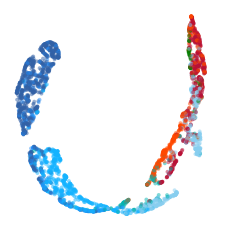

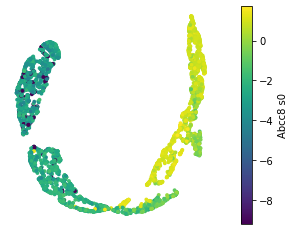

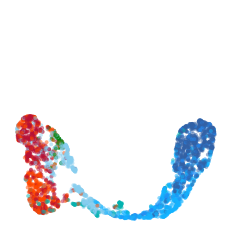

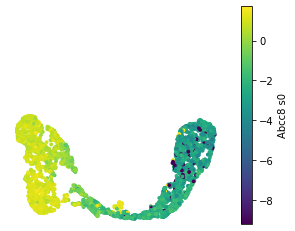

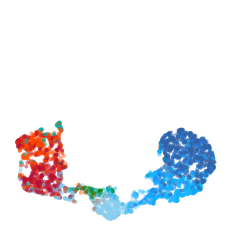

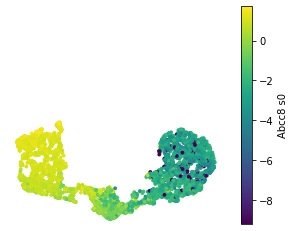

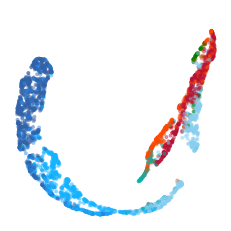

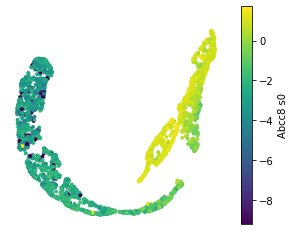

In [13]:
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,gene='Abcc8',color_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [36]:
from celldancer.utilities import rank_rsquare

In [49]:
%load_ext autoreload
%autoreload 2

cluster_choice=list(cellDancer_df.clusters.drop_duplicates())
rsquare_rank=rank_rsquare(cellDancer_df,gene_list=gene_list,cluster_choice=cluster_choice)
rsquare_rank

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculate rsquare: 100%|████████████████████████| 28/28 [00:06<00:00,  4.49it/s]


,gene_name,r_square
0,Btbd17,0.976597
1,Sulf2,0.963845
2,Rbfox3,0.951194
3,Wfdc15b,0.947987
4,Map1b,0.939678
5,Nfib,0.927527
6,Adk,0.927370
7,Ppp3ca,0.920053
8,Smoc1,0.918295
9,Gnao1,0.916941
